In [1]:
!pip install -q jmd_imagescraper
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()
!pip install fastai --upgrade 



Requirement already up-to-date: fastai in /opt/conda/envs/fastai/lib/python3.8/site-packages (2.3.1)


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from pathlib import Path
root = Path().cwd()/"bears"

In [18]:
from pathlib import Path
root = Path().cwd()/"bears"

from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *

duckduckgo_search(root, "grizzly", "grizzly bear", max_results=100)
duckduckgo_search(root, "black", "black bear", max_results=100)
duckduckgo_search(root, "teddy", "teddy bears", max_results=100)


Duckduckgo search: grizzly bear


Exception occured while retrieving https://tse3.mm.bing.net/th?id=OIP.YxyIxwBPeRd58wqXoTYs2QHaHa&pid=Api
Exception occured while retrieving https://tse4.mm.bing.net/th?id=OIP.qyNKzEjLLhzaQHLTU6O3owAAAA&pid=Api
Duckduckgo search: black bear


Duckduckgo search: teddy bears


Exception occured while retrieving https://tse3.mm.bing.net/th?id=OIP.38L_H7W8LaiMmfjHLMbG_AHaHs&pid=Api


[Path('/notebooks/bears/teddy/001_109b2e22.jpg'),
 Path('/notebooks/bears/teddy/002_fb36eabf.jpg'),
 Path('/notebooks/bears/teddy/003_c8775ca5.jpg'),
 Path('/notebooks/bears/teddy/004_716209fd.jpg'),
 Path('/notebooks/bears/teddy/005_5d642a55.jpg'),
 Path('/notebooks/bears/teddy/006_d07ab818.jpg'),
 Path('/notebooks/bears/teddy/007_25fdc8ea.jpg'),
 Path('/notebooks/bears/teddy/008_cfe01562.jpg'),
 Path('/notebooks/bears/teddy/009_33d016bb.jpg'),
 Path('/notebooks/bears/teddy/010_2332961d.jpg'),
 Path('/notebooks/bears/teddy/011_7cae6b83.jpg'),
 Path('/notebooks/bears/teddy/012_4cb02943.jpg'),
 Path('/notebooks/bears/teddy/013_a8d59611.jpg'),
 Path('/notebooks/bears/teddy/014_da1180ca.jpg'),
 Path('/notebooks/bears/teddy/015_b51832f8.jpg'),
 Path('/notebooks/bears/teddy/016_fd6db77e.jpg'),
 Path('/notebooks/bears/teddy/017_008df348.jpg'),
 Path('/notebooks/bears/teddy/018_8f901f81.jpg'),
 Path('/notebooks/bears/teddy/019_387d792d.jpg'),
 Path('/notebooks/bears/teddy/020_1f90c428.jpg'),


In [19]:
root

Path('/notebooks/bears')

In [ ]:
#pip install fastai==2.0.19 fastcore==1.3.2

In [20]:
bears = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2,seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))

In [26]:
fns = get_image_files('/notebooks/bears')

In [27]:

fns

(#297) [Path('/notebooks/bears/grizzly/058_56169b50.jpg'),Path('/notebooks/bears/grizzly/076_23532b03.jpg'),Path('/notebooks/bears/grizzly/047_0ca5db84.jpg'),Path('/notebooks/bears/grizzly/020_7d1b02ea.jpg'),Path('/notebooks/bears/grizzly/012_ca40c9fc.jpg'),Path('/notebooks/bears/grizzly/024_f47597c4.jpg'),Path('/notebooks/bears/grizzly/062_0d8483e2.jpg'),Path('/notebooks/bears/grizzly/079_6439e335.jpg'),Path('/notebooks/bears/grizzly/018_aeebb21a.jpg'),Path('/notebooks/bears/grizzly/002_cc3b8b62.jpg')...]

In [31]:
failed = verify_images (fns)
failed

(#0) []

In [29]:
failed.map(Path.unlink)

(#0) []

In [30]:
??verify_images

In [32]:
get_image_files

<function fastai.data.transforms.get_image_files(path, recurse=True, folders=None)>

In [36]:
path = Path('/notebooks/bears')


In [37]:
path

Path('/notebooks/bears')

In [38]:
dls = bears.dataloaders(path)

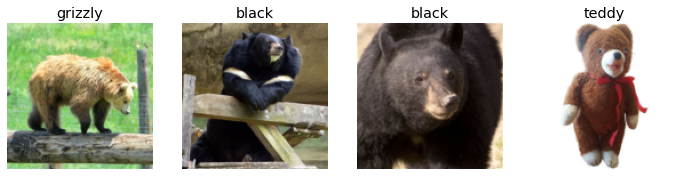

In [42]:
dls.valid.show_batch(max_n=4, nrows=1)

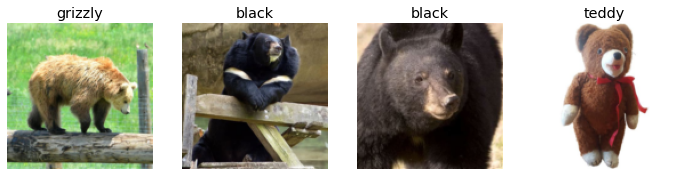

In [43]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

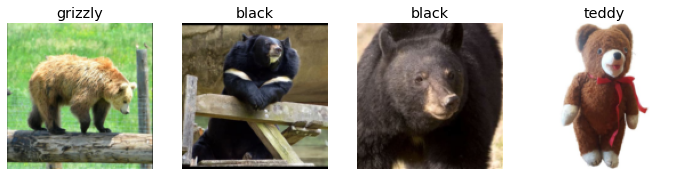

In [44]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad,pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

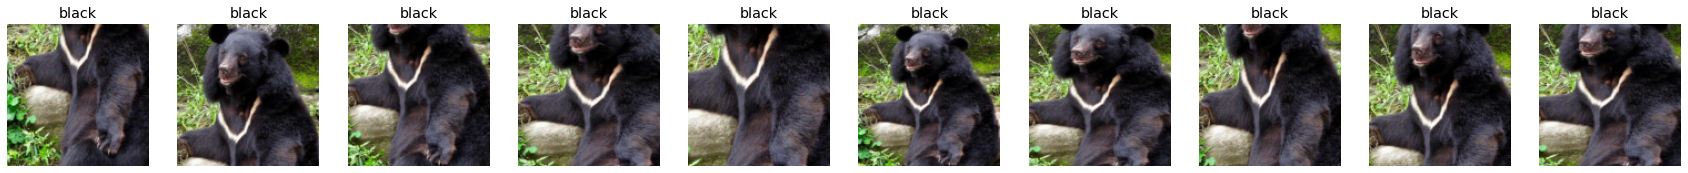

In [46]:
bears=bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.3)
               )
dls=bears.dataloaders(path)
dls.train.show_batch(max_n=10,nrows=1,unique=True)

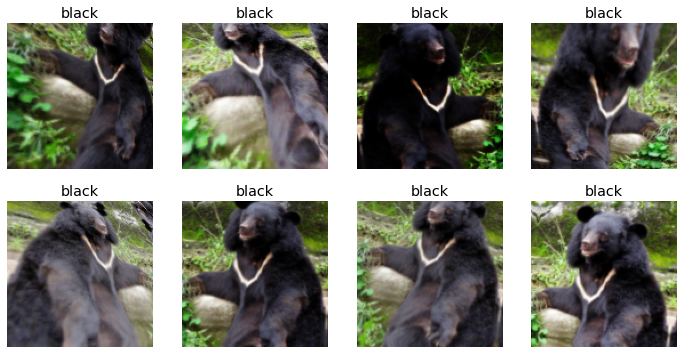

In [48]:
bears = bears.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls=bears.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [49]:
bears = bears.new(
        item_tfms=RandomResizedCrop(224,min_scale=0.5),
        batch_tfms=aug_transforms())
dls=bears.dataloaders(path)

In [50]:
learn = cnn_learner(dls,resnet18,metrics =error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.553222,0.355261,0.118644,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.403721,0.174341,0.033898,00:03
1,0.327351,0.097098,0.033898,00:03
2,0.251065,0.055059,0.016949,00:03
3,0.210006,0.049507,0.016949,00:03


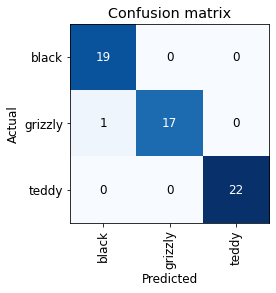

In [51]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

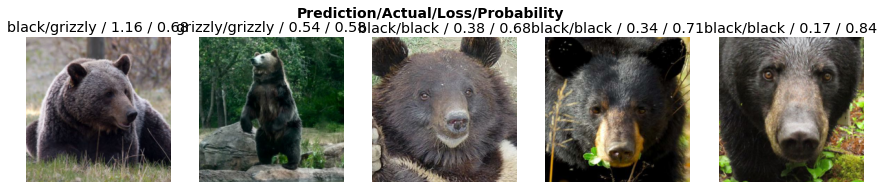

In [52]:
interp.plot_top_losses(5, nrows=1)

In [53]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [54]:

learn.export()

In [55]:
path=Path()

In [56]:
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [57]:
learn_inf = load_learner(path/'export.pkl')

In [60]:
learn_inf.predict('/notebooks/bears/teddy/004_716209fd.jpg')

('teddy', tensor(2), tensor([7.9621e-06, 3.5859e-06, 9.9999e-01]))

In [61]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [80]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [63]:
btn_upload = SimpleNamespace(data=['/notebooks/bears/teddy/004_716209fd.jpg'])

In [64]:
img = PILImage.create(btn_upload.data[-1])

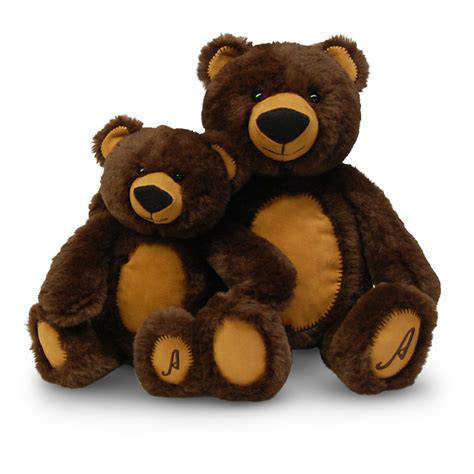

In [65]:
img

In [66]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [67]:
pred, pred_idx, probs = learn_inf.predict(img)

In [68]:
learn_inf.predict(img)

('teddy', tensor(2), tensor([7.9621e-06, 3.5859e-06, 9.9999e-01]))

In [69]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [70]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [81]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [77]:
btn_upload = widgets.FileUpload()

In [82]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

NameError: name 'btn' is not defined

NameError: name 'btn' is not defined

NameError: name 'btn' is not defined

In [83]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila


     |████████████████████████████████| 1.6 MB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 382 kB 27.1 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 26.7 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 6.5 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.10 O